In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [286]:
df=pd.read_csv('realestate.csv')
df.head(5)

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...


In [6]:
df.shape

(147536, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [13]:
df.isna().sum()

title                              0
country                          130
location                         131
building_construction_year         0
building_total_floors          77376
apartment_floor                90832
apartment_rooms                71350
apartment_bedrooms            108397
apartment_bathrooms            89173
apartment_total_area            4706
apartment_living_area         117769
price_in_USD                       0
image                              0
url                                0
Country                            0
dtype: int64

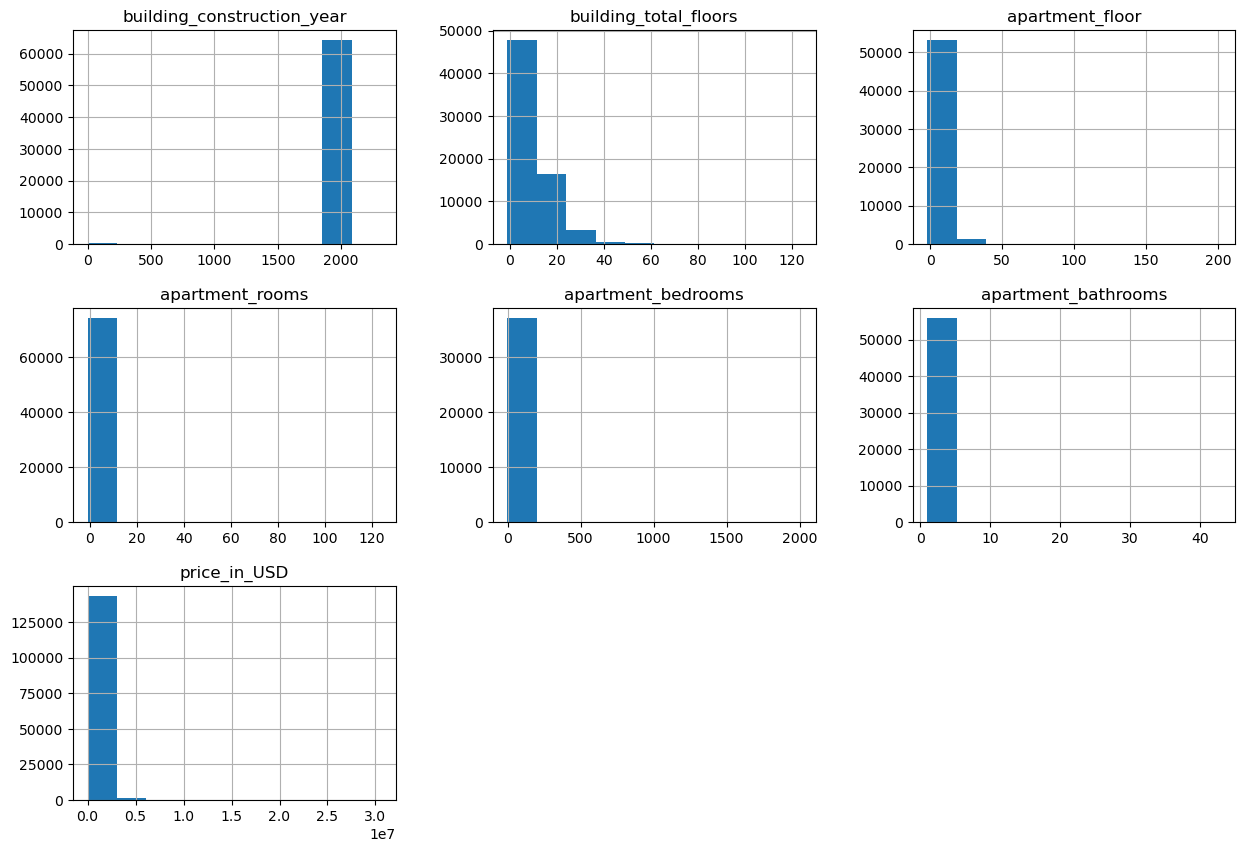

In [292]:
df.select_dtypes(include="number").hist(figsize=(15, 10))
plt.show()


In [9]:
df.dropna(subset=['price_in_USD'],inplace=True)

In [10]:
df['Country']= df['title'].str.extract(r'\,\s(.+$)')

In [11]:
df['Country'].isna().sum()

0

In [12]:
df['building_construction_year']=df['building_construction_year'].fillna(df['building_construction_year'].median())

In [14]:
df['Total_area(m²)']= df['title'].str.extract(r'.\s(\d+)\sm²\s')

In [15]:
df['Total_area(m²)'] = pd.to_numeric(df['Total_area(m²)'], errors='coerce')

In [16]:
df['apartment_floor']=df['title'].str.extract(r'^(\d)').replace(np.nan,0).astype('int')

In [17]:
df['apartment_floors']=df['title'].str.extract(r'\s(\d)\s').replace(np.nan,0).astype('int')

In [18]:
df['apartment']=df['apartment_floor']+df['apartment_floors']

In [19]:
df['apartment'][df['apartment'] == 0].sum()

0

In [20]:
df['apartment'].isna().sum()

0

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [22]:
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['Total_area(m²)','price_in_USD','building_total_floors']]=knn_imputer.fit_transform(df[['Total_area(m²)','price_in_USD','building_total_floors']])

In [23]:
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['building_total_floors','price_in_USD','apartment_rooms']]=knn_imputer.fit_transform(df[['building_total_floors','price_in_USD','apartment_rooms']])

In [24]:
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['apartment_rooms','price_in_USD','apartment_bedrooms']]=knn_imputer.fit_transform(df[['apartment_rooms','price_in_USD','apartment_bedrooms']])

In [25]:
knn_imputer = KNNImputer(n_neighbors=3,weights='distance')
df[['apartment_rooms','apartment_bedrooms','apartment_bathrooms']]=knn_imputer.fit_transform(df[['apartment_rooms','apartment_bedrooms','apartment_bathrooms']])

In [26]:
df['title'].iloc[35]

'2 room apartment 89 m² in Budva, Montenegro'

In [27]:
df['Country'].iloc[35]

'Montenegro'

In [28]:
df['Location']= df['title'].str.extract(r'.+\s(.+\s.+)$')

In [29]:
df['Location'].isna().sum()

0

In [44]:
df.isna().sum()

title                           0
building_construction_year      0
total floors in the building    0
n.of houses                     0
apartment_bedrooms              0
apartment_bathrooms             0
price_in_USD                    0
Country                         0
Total_area(m²)                  0
n.of apartment                  0
Location                        0
dtype: int64

In [32]:
df.drop(columns=['country','location','apartment_floor','apartment_floors','image','url','apartment_living_area'],inplace=True)

In [34]:
df.drop(columns=['apartment_total_area'],inplace=True)

In [39]:
df.rename(columns={'apartment_rooms':'n.of houses'},inplace=True)

In [41]:
df.rename(columns={'apartment':'n.of apartment'},inplace=True)

In [43]:
df.rename(columns={'building_total_floors':'total floors in the building'},inplace=True)

In [42]:
df['building_total_floors'].unique()

array([ 5.        ,  2.        , 15.        , ...,  1.89361702,
       10.15844903,  5.67484397])

In [45]:
df.head()

,title,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Location
0,2 room apartment 120 m² in Mediterranean Regio...,2021.0,5.0,3.000000,2.000000,2.000000,315209.0,Turkey,120.0,2,"Region, Turkey"
1,"4 room villa 500 m² in Kalkan, Turkey",2021.0,2.0,4.666667,3.333333,1.298567,1108667.0,Turkey,500.0,4,"Kalkan, Turkey"
2,"1 room apartment 65 m² in Antalya, Turkey",2021.0,5.0,2.000000,1.000000,1.000000,173211.0,Turkey,65.0,1,"Antalya, Turkey"
3,"1 room apartment in Pattaya, Thailand",2020.0,15.0,2.000000,1.000000,1.000000,99900.0,Thailand,103.0,1,"Pattaya, Thailand"
4,"2 room apartment in Pattaya, Thailand",2026.0,8.0,3.000000,2.000000,1.000000,67000.0,Thailand,155.0,2,"Pattaya, Thailand"


In [46]:
df.to_csv('real_estate_final.csv',index=False)

In [90]:

import pandas as pd
df=pd.read_csv('real_estate_final.csv')
df.head()

,title,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Location
0,2 room apartment 120 m² in Mediterranean Regio...,2021.0,5.0,3.000000,2.000000,2.000000,315209.0,Turkey,120.0,2,"Region, Turkey"
1,"4 room villa 500 m² in Kalkan, Turkey",2021.0,2.0,4.666667,3.333333,1.298567,1108667.0,Turkey,500.0,4,"Kalkan, Turkey"
2,"1 room apartment 65 m² in Antalya, Turkey",2021.0,5.0,2.000000,1.000000,1.000000,173211.0,Turkey,65.0,1,"Antalya, Turkey"
3,"1 room apartment in Pattaya, Thailand",2020.0,15.0,2.000000,1.000000,1.000000,99900.0,Thailand,103.0,1,"Pattaya, Thailand"
4,"2 room apartment in Pattaya, Thailand",2026.0,8.0,3.000000,2.000000,1.000000,67000.0,Thailand,155.0,2,"Pattaya, Thailand"


In [91]:
df.drop(columns=['title'],inplace=True)

In [92]:
df[['total floors in the building','building_construction_year','apartment_bedrooms','apartment_bathrooms','price_in_USD','Total_area(m²)','n.of apartment','n.of houses']]=df[['total floors in the building','building_construction_year','apartment_bedrooms','apartment_bathrooms','price_in_USD','Total_area(m²)','n.of apartment','n.of houses']].astype(int)

In [93]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Location
0,2021,5,3,2,2,315209,Turkey,120,2,"Region, Turkey"
1,2021,2,4,3,1,1108667,Turkey,500,4,"Kalkan, Turkey"
2,2021,5,2,1,1,173211,Turkey,65,1,"Antalya, Turkey"
3,2020,15,2,1,1,99900,Thailand,103,1,"Pattaya, Thailand"
4,2026,8,3,2,1,67000,Thailand,155,2,"Pattaya, Thailand"


In [94]:
df['Country'].unique()

array(['Turkey', 'Thailand', 'Georgia', 'Montenegro', 'Northern Cyprus',
       'Lithuania', 'Belarus', 'UAE', 'Czech Republic', 'Uzbekistan',
       'Greece', 'Serbia', 'Italy', 'Hungary',
       'West Greece and Ionian Sea, Greece', 'Russia', 'Finland',
       'Poland', 'Austria', 'Spain', 'Latvia', 'Portugal', 'Armenia',
       'Croatia', 'Australia', 'Indonesia'], dtype=object)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144961 entries, 0 to 144960
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   building_construction_year    144961 non-null  int32 
 1   total floors in the building  144961 non-null  int32 
 2   n.of houses                   144961 non-null  int32 
 3   apartment_bedrooms            144961 non-null  int32 
 4   apartment_bathrooms           144961 non-null  int32 
 5   price_in_USD                  144961 non-null  int32 
 6   Country                       144961 non-null  object
 7   Total_area(m²)                144961 non-null  int32 
 8   n.of apartment                144961 non-null  int32 
 9   Location                      144961 non-null  object
dtypes: int32(8), object(2)
memory usage: 6.6+ MB


In [96]:
df['Locality']=df['Location'].str.extract(r'(.+),\s')

In [97]:
df['Locality'].isna().sum()

2195

In [98]:
df=df.dropna()

In [99]:
df.isna().sum()

building_construction_year      0
total floors in the building    0
n.of houses                     0
apartment_bedrooms              0
apartment_bathrooms             0
price_in_USD                    0
Country                         0
Total_area(m²)                  0
n.of apartment                  0
Location                        0
Locality                        0
dtype: int64

In [100]:
df.shape

(142766, 11)

In [101]:
df.drop(columns=['Location'],inplace=True)

In [102]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Locality
0,2021,5,3,2,2,315209,Turkey,120,2,Region
1,2021,2,4,3,1,1108667,Turkey,500,4,Kalkan
2,2021,5,2,1,1,173211,Turkey,65,1,Antalya
3,2020,15,2,1,1,99900,Thailand,103,1,Pattaya
4,2026,8,3,2,1,67000,Thailand,155,2,Pattaya


In [103]:
# labelEncoder the categorical features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


df["locality_en"]=encoder.fit_transform(df[["Locality"]])
df["Country_en"]=encoder.fit_transform(df[["Country"]])

In [104]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Country,Total_area(m²),n.of apartment,Locality,locality_en,Country_en
0,2021,5,3,2,2,315209,Turkey,120,2,Region,4162,20
1,2021,2,4,3,1,1108667,Turkey,500,4,Kalkan,2025,20
2,2021,5,2,1,1,173211,Turkey,65,1,Antalya,215,20
3,2020,15,2,1,1,99900,Thailand,103,1,Pattaya,3685,19
4,2026,8,3,2,1,67000,Thailand,155,2,Pattaya,3685,19


In [105]:
df.drop(columns=['Country','Locality'],inplace=True)

In [106]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
0,2021,5,3,2,2,315209,120,2,4162,20
1,2021,2,4,3,1,1108667,500,4,2025,20
2,2021,5,2,1,1,173211,65,1,215,20
3,2020,15,2,1,1,99900,103,1,3685,19
4,2026,8,3,2,1,67000,155,2,3685,19


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142766 entries, 0 to 144960
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   building_construction_year    142766 non-null  int32
 1   total floors in the building  142766 non-null  int32
 2   n.of houses                   142766 non-null  int32
 3   apartment_bedrooms            142766 non-null  int32
 4   apartment_bathrooms           142766 non-null  int32
 5   price_in_USD                  142766 non-null  int32
 6   Total_area(m²)                142766 non-null  int32
 7   n.of apartment                142766 non-null  int32
 8   locality_en                   142766 non-null  int32
 9   Country_en                    142766 non-null  int32
dtypes: int32(10)
memory usage: 6.5 MB


In [107]:
df.to_csv('real_estate_finals.csv',index=False)

In [310]:
df=pd.read_csv('real_estate_finals.csv')
df.head(3)

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
0,2021,5,3,2,2,315209,120,2,4162,20
1,2021,2,4,3,1,1108667,500,4,2025,20
2,2021,5,2,1,1,173211,65,1,215,20


In [311]:
df=df[df['n.of houses']>1]

In [ ]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [312]:
df=df[df['building_construction_year']<2026]
df=df[df['building_construction_year']>999]

In [313]:
df=df[df['total floors in the building']<73]

In [314]:
df=df[df['n.of houses']<20]

In [315]:
df=df[df['apartment_bedrooms']<10]

In [316]:
df=df[df['apartment_bathrooms']<6]

In [317]:
df=df[df['Total_area(m²)']<450]

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114047 entries, 0 to 142765
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   building_construction_year    114047 non-null  int64
 1   total floors in the building  114047 non-null  int64
 2   n.of houses                   114047 non-null  int64
 3   apartment_bedrooms            114047 non-null  int64
 4   apartment_bathrooms           114047 non-null  int64
 5   price_in_USD                  114047 non-null  int64
 6   Total_area(m²)                114047 non-null  int64
 7   n.of apartment                114047 non-null  int64
 8   locality_en                   114047 non-null  int64
 9   Country_en                    114047 non-null  int64
dtypes: int64(10)
memory usage: 9.6 MB


In [319]:
df.describe()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
count,114047.000000,114047.000000,114047.000000,114047.000000,114047.000000,1.140470e+05,114047.00000,114047.000000,114047.000000,114047.000000
mean,2015.722001,7.293221,2.892027,1.835699,1.310477,3.877376e+05,123.98313,2.638237,2614.157567,12.968794
std,18.277501,7.128694,0.962534,0.886394,0.589404,6.455519e+05,83.78486,1.528997,1813.612886,6.034063
min,1111.000000,-1.000000,2.000000,-1.000000,1.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,2.000000,1.000000,1.000000,1.250000e+05,64.00000,2.000000,724.000000,8.000000
50%,2021.000000,5.000000,3.000000,2.000000,1.000000,2.152120e+05,97.00000,3.000000,2733.000000,13.000000
75%,2021.000000,10.000000,3.000000,2.000000,2.000000,4.152130e+05,155.00000,3.000000,4213.000000,19.000000
max,2025.000000,72.000000,18.000000,9.000000,5.000000,2.410959e+07,449.00000,18.000000,5804.000000,23.000000


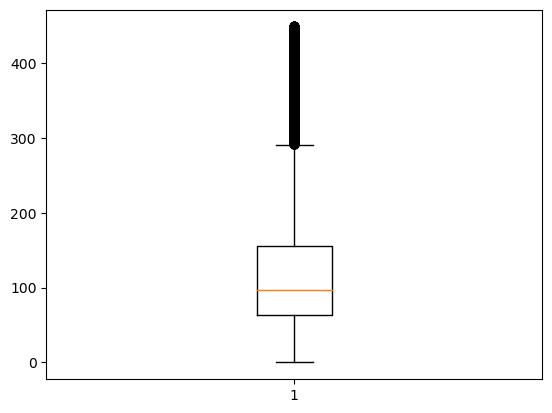

In [320]:
plt.boxplot(df['Total_area(m²)'])
plt.show()

In [321]:
df.to_csv('real_estate_finalsss.csv',index=False)

In [324]:
df=pd.read_csv('real_estate_finalsss.csv')
df.head(3)

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
0,2021,5,3,2,2,315209,120,2,4162,20
1,2021,5,2,1,1,173211,65,1,215,20
2,2020,15,2,1,1,99900,103,1,3685,19


In [325]:
X = df.drop(columns=['price_in_USD'])
y = df.price_in_USD

In [326]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 50)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(85535, 9) (85535,)
(28512, 9) (28512,)


In [327]:

X_train.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,Total_area(m²),n.of apartment,locality_en,Country_en
60400,1972,5,2,1,1,50,2,3102,3
98902,2021,1,4,3,2,340,0,4533,7
9518,2021,7,2,2,1,83,2,843,20
62774,1999,1,3,2,1,96,3,3416,3
85160,2021,7,3,1,1,131,2,1404,18


In [328]:
X_train.shape

(85535, 9)

In [333]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics


In [334]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [335]:
scaler = MinMaxScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [341]:
X_test_scaled

array([[0.99578947, 0.125     , 0.        , ..., 0.11111111, 0.36181943,
        0.86956522],
       [0.99157895, 0.02777778, 0.        , ..., 0.11111111, 0.25585803,
        0.34782609],
       [0.99789474, 0.01388889, 0.1875    , ..., 0.16666667, 0.99224673,
        0.30434783],
       ...,
       [0.73684211, 0.01388889, 0.        , ..., 0.        , 0.94589938,
        0.17391304],
       [0.99157895, 0.01388889, 0.0625    , ..., 0.11111111, 0.57994487,
        0.30434783],
       [0.89473684, 0.06944444, 0.        , ..., 0.11111111, 0.11922812,
        0.13043478]])

In [336]:
model = SVR(
    kernel='rbf',
    C=10,
    gamma='scale'
)

model.fit(X_train_scaled, y_train)


SVR(C=10)

In [337]:
y_test_pred = model.predict(X_test_scaled)


In [338]:
y_test_pred

array([205068.3527703 , 188013.53278151, 211349.58252699, ...,
       185371.31186839, 205059.65794784, 183565.94077056])

In [339]:
print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()

Model's MAE : 244944.0007713536
Model's MSE : 372431711184.19727
Model's RMSE : 494.9181758345046
Model's R2 score : -0.03193636761710961



In [340]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize scaler
scaler = MinMaxScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate (Regression)
print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()


Model's MAE : 244944.0007713536
Model's MSE : 372431711184.19727
Model's RMSE : 494.9181758345046
Model's R2 score : -0.03193636761710961



# Applying RIDGE for overfitting

In [202]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)


Ridge(alpha=10)

In [203]:
from sklearn import metrics
y_test_pred = ridge.predict(X_test)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()

Model's MAE : 231518.31335799096
Model's MSE : 235385789521.4287
Model's RMSE : 481.16349961108955
Model's R2 score : 0.32358344810227135



In [204]:
ridge.score(X_train,y_train)

0.27698795278562405

# Applying LASSO for overfitting

In [205]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

In [206]:
y_test_pred = lasso.predict(X_test)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()

Model's MAE : 231524.6838967654
Model's MSE : 235386338671.47903
Model's RMSE : 481.17011949700844
Model's R2 score : 0.3235818700368144



In [207]:
lasso.score(X_train,y_train)

0.27698795525467

# applying GradientBoostingRegressor for overfitting

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,         
    random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          random_state=42, subsample=0.8)

In [209]:
y_test_pred = gbr.predict(X_test)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()

Model's MAE : 169498.5505706968
Model's MSE : 160929155294.50803
Model's RMSE : 411.702016719249
Model's R2 score : 0.5375458113021924



In [210]:
gbr.score(X_train,y_train)

0.6646644791354208

# log transform

In [211]:
X_train_log=np.log1p(X_train)
X_test_log=np.log1p(X_test)

In [212]:
y_train_log=np.log1p(y_train)
y_test_log=np.log1p(y_test)

In [213]:
X_train_log.isna().sum()

building_construction_year       7557
total floors in the building        3
n.of houses                         0
apartment_bedrooms                180
apartment_bathrooms                 0
Total_area(m²)                   3272
n.of apartment                  15997
locality_en                     22348
Country_en                      11553
dtype: int64

In [309]:
df.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,price_in_USD,Total_area(m²),n.of apartment,locality_en,Country_en
0,2021,5,3,2,2,315209,120,2,4162,20
2,2021,5,2,1,1,173211,65,1,215,20
3,2020,15,2,1,1,99900,103,1,3685,19
6,2007,2,5,4,4,274415,245,4,5564,20
8,2021,11,2,1,1,168881,74,1,4143,13


# StandardScaler

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= pd.DataFrame(scaler.fit_transform(X_train),columns = scaler.get_feature_names_out(),index = X_train.index)
X_train.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,Total_area(m²),n.of apartment,locality_en,Country_en
77010,-2.403942,-0.322235,-0.931054,-0.942826,-0.527094,-0.883845,-0.415149,0.267574,-1.650782
124113,0.289328,-0.884279,1.158572,1.316443,1.173777,2.567184,-1.720010,1.056967,-0.988295
10155,0.289328,-0.041213,-0.931054,0.186809,-0.527094,-0.491141,-0.415149,-0.978575,1.164787
79864,-0.919895,-0.884279,0.113759,0.186809,-0.527094,-0.336440,0.237281,0.440788,-1.650782
107285,0.289328,-0.041213,0.113759,-0.942826,-0.527094,0.080063,-0.415149,-0.669106,0.833544


# # Apply transformation on Numerical data

In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test.index)

X_test.head()

,building_construction_year,total floors in the building,n.of houses,apartment_bedrooms,apartment_bathrooms,Total_area(m²),n.of apartment,locality_en,Country_en
59148,0.509187,0.380320,-0.931054,-0.942826,-0.527094,-0.967145,-0.415149,1.105512,0.502300
46582,0.289328,-0.743768,-0.931054,-0.942826,-0.527094,-0.883845,-0.415149,-0.143947,-0.822674
14568,0.289328,-0.884279,-0.931054,-0.942826,-0.527094,-0.764844,-1.067580,-0.343089,1.164787
61105,0.509187,0.380320,0.113759,-0.942826,-0.527094,-0.574442,0.237281,1.105512,0.502300
112201,0.289328,0.661342,-0.931054,0.186809,-0.527094,2.091180,-1.720010,-1.044220,0.005435


# LinearRegression

In [236]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

regressor = LinearRegression()
regressor.fit(X_train, y_train_log)

y_test_pred = regressor.predict(X_test)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()

Model's MAE : 381207.99170147965
Model's MSE : 493308446361.2855
Model's RMSE : 617.4204334985033
Model's R2 score : -0.41759618959218914

CPU times: total: 109 ms
Wall time: 37 ms


In [237]:
regressor.score(X_train,y_train)

-0.3457903533117479

# KNeighborsRegressor

In [218]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()


Model's MAE : 170783.84705387207
Model's MSE : 185685413399.00922
Model's RMSE : 413.26002353708503
Model's R2 score : 0.4664049714962599

CPU times: total: 6.84 s
Wall time: 6.92 s


In [219]:
knn.score(X_train,y_train)

0.6265922519590954

# DecisionTreeRegressor

In [165]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

y_test_pred = DTR.predict(X_test)


print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()



Model's MAE : 236628.50353110157
Model's MSE : 598921596015.1144
Model's RMSE : 486.4447589717681
Model's R2 score : 0.1724182307779506

CPU times: total: 797 ms
Wall time: 822 ms


# RandomForestRegressor

In [285]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_test_pred = rfr.predict(X_test)

print("Model's MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Model's MSE :", metrics.mean_squared_error(y_test, y_test_pred))
print("Model's RMSE :", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("Model's R2 score :", metrics.r2_score(y_test, y_test_pred))
print()


Model's MAE : 151636.9616011626
Model's MSE : 148213777522.16183
Model's RMSE : 389.40590853396486
Model's R2 score : 0.5740853662444605

CPU times: total: 1min 6s
Wall time: 1min 7s


In [239]:
rfr.score(X_train,y_train)

0.9302813017087279

In [240]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [241]:
param_dist = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.7],
    'bootstrap': [True]
}


In [ ]:
%%time

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                        
    scoring='neg_mean_squared_error', 
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
CPU times: total: 2min 41s
Wall time: 16min 40s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', 0.7],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [272]:
best_rf = rf_random.best_estimator_

print("Best Parameters:")
print(rf_random.best_params_)


Best Parameters:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


In [ ]:
y_pred = best_rf.predict(X_test)

print("MAE  :", mean_absolute_error(y_test, y_pred))
print("MSE  :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²   :", r2_score(y_test, y_pred))


MAE  : 148542.63734817473
MSE  : 138693319755.00888
RMSE : 372415.52029286977
R²   : 0.6014438368999684


In [279]:
y_rrrr = best_rf.predict(X_test)

In [281]:
r2_score(y_test, y_rrrr)

0.6014438368999684

In [282]:
X_rrrr = best_rf.predict(X_train)

In [283]:
r2_score(y_train, X_rrrr)

0.8205058306612931